# Digits Dataset Using H2o.ai
**By: Amr Ezzat**

## IMPORT RESOURCES

In [29]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 

from h2o.sklearn import H2OAutoMLClassifier

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,21 days 18 hours 43 mins
H2O_cluster_timezone:,Asia/Dubai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_home_oyiep6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,714 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [30]:
# Fetching dataset 
digits = load_digits()

<Figure size 432x288 with 0 Axes>

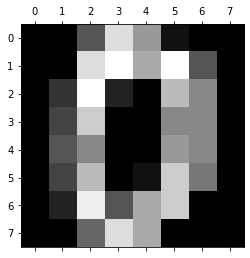

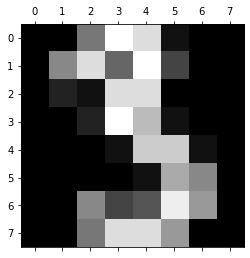

In [31]:
# Printing Digits
plt.gray() 
plt.matshow(digits.images[0])
plt.matshow(digits.images[3])
plt.show() 

## DATA PREPARATION

In [32]:
X, y = datasets.load_digits(return_X_y=True)

## TRAIN TEST SPLIT

In [33]:
# Splitting data 80% training data 20% test data
X_train, X_test,y_train,y_test = train_test_split(X, y,
                                                    train_size=0.8, test_size=0.2)


## H2O.ai

In [34]:
pipeline = Pipeline([
    ('classifier', H2OAutoMLClassifier(max_runtime_secs = 1200 , seed = 45, verbosity="info" , exclude_algos = ['StackedEnsemble']))
])
pipeline.fit(X_train, y_train)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
20:50:28.535: Project: AutoML_20210501_205028533
20:50:28.537: Setting stopping tolerance adaptively based on the training frame: 0.026379807127383248
20:50:28.537: Build control seed: 45
20:50:28.538: training frame: Frame key: automl_training_py_90_sid_942a    cols: 65    rows: 1437  chunks: 1    size: 76638  checksum: -14645033723520
20:50:28.539: validation frame: NULL
20:50:28.539: leaderboard frame: NULL
20:50:28.539: blending frame: NULL
20:50:28.539: response column: C110
20:50:28.539: fold column: null
20:50:28.539: weights column: null
20:50:28.543: Loading execution steps: [{XGBoost : defaults}, {GLM : defaults}, {DRF : [def_1]}, {GBM : defaults}, {DeepLearning : defaults}, {DRF : [XRT]}, {XGBoost : grids}, {GBM : grids}, {DeepLearning : grids}, {GBM : [lr_annealing]}, {XGBoost : [lr_search]}, {St

Pipeline(steps=[('classifier',
                 H2OAutoMLClassifier(exclude_algos=['StackedEnsemble'],
                                     max_runtime_secs=1200, seed=45,
                                     verbosity='info'))])

## RESULTS

In [35]:
from sklearn.metrics import classification_report

preds = pipeline.predict(X_test)
print(classification_report(y_test, preds))

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.95      0.97      0.96        39
           2       1.00      1.00      1.00        41
           3       0.97      0.97      0.97        31
           4       0.97      1.00      0.98        31
           5       0.93      0.97      0.95        38
           6       1.00      0.97      0.98        32
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        41
           9       0.98      0.98      0.98        42

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



In [36]:
# Leaderboard
automl = pipeline.named_steps.classifier.estimator
automl.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
GBM_grid__1_AutoML_20210501_205028_model_14,0.0207354,0.068012,0.135194,0.0182775,nan,nan
GBM_grid__1_AutoML_20210501_205028_model_3,0.0210479,0.0803275,0.147826,0.0218526,nan,nan
GBM_grid__1_AutoML_20210501_205028_model_16,0.022069,0.065986,0.134791,0.0181685,nan,nan
GBM_grid__1_AutoML_20210501_205028_model_8,0.0229039,0.0655657,0.138849,0.019279,nan,nan
GBM_grid__1_AutoML_20210501_205028_model_1,0.0234378,0.0734413,0.143656,0.0206369,nan,nan
GBM_grid__1_AutoML_20210501_205028_model_15,0.0239674,0.0896702,0.156624,0.0245309,nan,nan
GBM_3_AutoML_20210501_205028,0.0246293,0.0850472,0.154563,0.0238897,nan,nan
XRT_1_AutoML_20210501_205028,0.0249418,0.369064,0.327176,0.107044,nan,nan
GBM_grid__1_AutoML_20210501_205028_model_7,0.026194,0.0854721,0.152897,0.0233776,nan,nan
GBM_grid__1_AutoML_20210501_205028_model_12,0.0263034,0.0861205,0.156421,0.0244674,nan,nan


In [43]:
# Print the leading pipeline 
automl.leader 

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210501_205028_model_14


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,79.0,790.0,436594.0,4.0,7.0,6.993671,12.0,58.0,39.268356




ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 3.600782871403423e-08
RMSE: 0.0001897572889615422
LogLoss: 0.00012177694987695619
Mean Per-Class Error: 0.0
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,Error,Rate
0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 146
1,0.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 143
2,0.0,0.0,136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 136
3,0.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 152
4,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0 / 150
5,0.0,0.0,0.0,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0 / 144
6,0.0,0.0,0.0,0.0,0.0,0.0,149.0,0.0,0.0,0.0,0.0,0 / 149
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,0.0,0.0,0.0,0 / 146
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,0.0,0.0,0 / 133
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,0.0,0 / 138



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,8,1.0
8,9,1.0
9,10,1.0



ModelMetricsMultinomial: gbm
** Reported on cross-validation data. **

MSE: 0.01827746592450804
RMSE: 0.13519417858956811
LogLoss: 0.06801202072193131
Mean Per-Class Error: 0.020735388250419807
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,3,4,5,6,7,8,9,Error,Rate
0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 146
1,0.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 143
2,0.0,1.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007353,1 / 136
3,0.0,0.0,0.0,150.0,0.0,0.0,0.0,1.0,1.0,0.0,0.013158,2 / 152
4,0.0,0.0,0.0,0.0,148.0,0.0,0.0,1.0,0.0,1.0,0.013333,2 / 150
5,0.0,0.0,0.0,0.0,0.0,142.0,1.0,0.0,0.0,1.0,0.013889,2 / 144
6,0.0,1.0,0.0,0.0,0.0,1.0,146.0,0.0,1.0,0.0,0.020134,3 / 149
7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,143.0,0.0,1.0,0.020548,3 / 146
8,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,122.0,5.0,0.082707,11 / 133
9,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,133.0,0.036232,5 / 138



Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.979819
1,2,0.995129
2,3,0.997912
3,4,0.999304
4,5,1.000000
5,6,1.000000
6,7,1.000000
7,8,1.000000
8,9,1.000000
9,10,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.97982484,0.012876507,0.9826389,0.96875,0.9860627,0.9651568,0.9965157
1,auc,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,aucpr,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,err,0.020175183,0.012876507,0.017361112,0.03125,0.013937282,0.034843206,0.0034843206
4,err_count,5.8,3.7013512,5.0,9.0,4.0,10.0,1.0
5,logloss,0.06800233,0.027348684,0.049840633,0.1000873,0.059555296,0.093068555,0.037459876
6,max_per_class_error,0.10060606,0.068212114,0.09090909,0.2,0.045454547,0.13333334,0.033333335
7,mean_per_class_accuracy,0.97847843,0.013562354,0.9812339,0.96638954,0.9843467,0.9637554,0.99666667
8,mean_per_class_error,0.021521555,0.013562354,0.018766092,0.033610463,0.015653297,0.03624459,0.0033333334
9,mse,0.018273978,0.009620048,0.013745717,0.027815325,0.014561674,0.02866921,0.006577961



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error,training_auc,training_pr_auc
0,,2021-05-01 21:04:45,3 min 32.709 sec,0.0,0.900000,2.302585,0.897008,NaN,NaN
1,,2021-05-01 21:04:45,3 min 32.781 sec,5.0,0.568560,0.855552,0.018789,NaN,NaN
2,,2021-05-01 21:04:45,3 min 32.857 sec,10.0,0.351473,0.419706,0.003479,NaN,NaN
3,,2021-05-01 21:04:46,3 min 32.925 sec,15.0,0.213140,0.215110,0.000696,NaN,NaN
4,,2021-05-01 21:04:46,3 min 32.992 sec,20.0,0.127233,0.112189,0.000000,NaN,NaN
5,,2021-05-01 21:04:46,3 min 33.067 sec,25.0,0.075044,0.059609,0.000000,NaN,NaN
6,,2021-05-01 21:04:46,3 min 33.132 sec,30.0,0.043156,0.031904,0.000000,NaN,NaN
7,,2021-05-01 21:04:46,3 min 33.196 sec,35.0,0.024833,0.017560,0.000000,NaN,NaN
8,,2021-05-01 21:04:46,3 min 33.272 sec,40.0,0.014058,0.009626,0.000000,NaN,NaN
9,,2021-05-01 21:04:46,3 min 33.336 sec,45.0,0.008138,0.005436,0.000000,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C37,219.704285,1.000000,0.051256
1,C30,203.064575,0.924263,0.047374
2,C29,180.115845,0.819810,0.042020
3,C62,175.441803,0.798536,0.040930
4,C28,174.346436,0.793550,0.040674
5,C34,171.531250,0.780737,0.040018
6,C61,165.136002,0.751628,0.038526
7,C19,163.659180,0.744907,0.038181
8,C21,154.787979,0.704529,0.036112
9,C55,154.746750,0.704341,0.036102



See the whole table with table.as_data_frame()


In [39]:
#Export Mojo file
automl.leader.download_mojo(path = "/Users/home/Documents/Downloads/")

'/Users/home/Documents/Downloads/GBM_grid__1_AutoML_20210501_205028_model_14.zip'